In [1]:
import hepytorch as hep
import logging

logging.basicConfig(
    format="%(asctime)s - %(levelname)s - %(message)s",
    style="%",
    datefmt="%Y-%m-%d %H:%M:%S",
    level=logging.INFO,
)

myHEP = hep.HEPTorch('./recipes/mass_estimator_resfcff.json')

2024-11-20 10:16:01 - INFO - Using cpu device
2024-11-20 10:16:01 - INFO - Using the following configuration
{
  "data": {
    "name": "CSVLoader",
    "kwargs": {
      "path": "./data/toymc/ttbar_1_30ll_test.csv",
      "format": "csv"
    }
  },
  "preprocessor": {
    "name": "ObservablesPreprocessor",
    "kwargs": {}
  },
  "model": {
    "name": "ResidualFCFF",
    "kwargs": {
      "input_features": 20,
      "hidden_features": 128,
      "output_features": 2
    }
  },
  "loss_fn": {
    "name": "CustomWeightedMSELoss",
    "kwargs": {}
  },
  "optimizer": {
    "name": "SGD",
    "kwargs": {
      "learning_rate": 1e-05,
      "momentum": 0.9
    }
  },
  "trainer": {
    "name": "BasicTrainer",
    "kwargs": {
      "epochs": 10,
      "batch_size": 20
    }
  }
}
2024-11-20 10:16:02 - INFO - Data shape: (25835, 50)
2024-11-20 10:16:02 - INFO - Data columns: Index(['toppx', 'toppy', 'toppz', 'topmass', 'bpx', 'bpy', 'bpz', 'bmass',
       'l+px', 'l+py', 'l+pz', 'l+mass', 'n

In [2]:
result = myHEP.train()

Epoch 0, loss: 0.9139279072436277
Epoch 1, loss: 0.9125088763445794
Epoch 2, loss: 0.9119281262851486
Epoch 3, loss: 0.9122800545827873
Epoch 4, loss: 0.9130341127736901
Epoch 5, loss: 0.9119848238301734
Epoch 6, loss: 0.9122479267858181
Epoch 7, loss: 0.9120815232520134
Epoch 8, loss: 0.9120585967689459
Epoch 9, loss: 0.9124625824880664


In [3]:
import matplotlib.pyplot as plt

masses = myHEP.model(myHEP.data).detach().numpy()
top_mass = masses[:, 0]
atop_mass = masses[:, 1]
true_masses = myHEP.target.detach().numpy()
true_mass = true_masses[:, 0]
print(top_mass)

[0.17839491 0.1783979  0.17840368 ... 0.17839795 0.17839989 0.17839399]


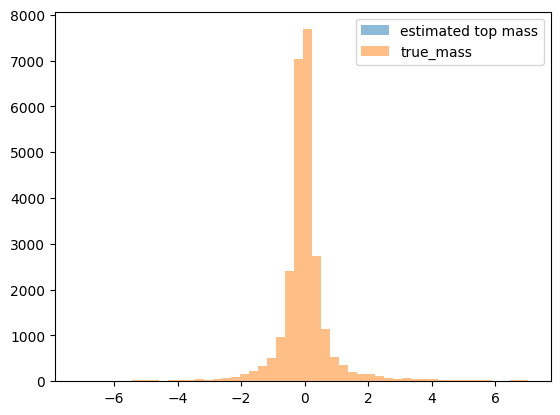

In [4]:
# draw two histograms of top_mass and true_mass
plt.hist(top_mass, bins=50, alpha=0.5, label="estimated top mass")
plt.hist(true_mass, bins=50, alpha=0.5, label="true_mass")
plt.legend(loc="upper right")
plt.show()